### Reference: [Andrej Karpathy YouTube video Link](https://www.youtube.com/watch?v=TCH_1BHY58I)

In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read in all the words
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [3]:
len(words)

32033

In [4]:
# build the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s, i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [5]:
# build the dataset

block_size = 3  # context length: how many characters do we take to predict the next one?
X, Y = [], []
# for w in words[:5]:
for w in words:
    # print(w)
    context = [0] * block_size
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        # print(''.join(itos[i] for i in context), '--->', itos[ix])
        context = context[1:] + [ix]  # crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)

In [6]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [7]:
X

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        ...,
        [26, 26, 25],
        [26, 25, 26],
        [25, 26, 24]])

In [8]:
Y

tensor([ 5, 13, 13,  ..., 26, 24,  0])

In [9]:
# Let's build lookup table
# possible characters 27
# have to embed them in a lower dimensional space (here, 2 dimensional)

In [10]:
C = torch.randn((27, 2))

In [11]:
C[5]

tensor([ 0.5022, -2.0088])

In [12]:
# this method and above is same just two other ways
F.one_hot(torch.tensor(5), num_classes=27).float() @ C

tensor([ 0.5022, -2.0088])

In [13]:
# embedding multiple times, in 1 dimension
C[torch.tensor([5, 6, 7, 7, 7, 7])]

tensor([[ 0.5022, -2.0088],
        [ 0.6035,  0.7310],
        [ 0.2629, -2.8335],
        [ 0.2629, -2.8335],
        [ 0.2629, -2.8335],
        [ 0.2629, -2.8335]])

In [14]:
C[X].shape

torch.Size([228146, 3, 2])

In [15]:
X[13, 2]

tensor(1)

In [16]:
C[X]

tensor([[[-0.9001, -0.5186],
         [-0.9001, -0.5186],
         [-0.9001, -0.5186]],

        [[-0.9001, -0.5186],
         [-0.9001, -0.5186],
         [ 0.5022, -2.0088]],

        [[-0.9001, -0.5186],
         [ 0.5022, -2.0088],
         [ 0.3540, -0.3434]],

        ...,

        [[-0.3201, -0.7552],
         [-0.3201, -0.7552],
         [ 0.5274,  1.6642]],

        [[-0.3201, -0.7552],
         [ 0.5274,  1.6642],
         [-0.3201, -0.7552]],

        [[ 0.5274,  1.6642],
         [-0.3201, -0.7552],
         [ 0.9351, -1.8624]]])

In [17]:
C[X][13, 2]

tensor([1.0034, 0.4340])

In [18]:
C[1]

tensor([1.0034, 0.4340])

In [19]:
emb = C[X]
emb.shape

torch.Size([228146, 3, 2])

In [20]:
W1 = torch.randn((6, 100))
b1 = torch.randn(100)

In [21]:
emb @ W1 + b1

RuntimeError: mat1 and mat2 shapes cannot be multiplied (684438x2 and 6x100)

In [22]:
emb[:, 0, :].shape

torch.Size([228146, 2])

In [23]:
emb[:, 1, :].shape

torch.Size([228146, 2])

In [24]:
emb[:, 2, :].shape

torch.Size([228146, 2])

In [25]:
torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], dim=1).shape

torch.Size([228146, 6])

In [26]:
# method 1
# same as above, using unbind so that it's not dependent on block size
torch.cat(torch.unbind(emb, 1), 1).shape

torch.Size([228146, 6])

In [27]:
# method 2: efficient way

a = torch.arange(18)
a

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [28]:
a.shape

torch.Size([18])

In [29]:
a.view(3, 3, 2)

tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15],
         [16, 17]]])

In [30]:
a.storage() # one dimentional vector, stored linearly in memory

/tmp/ipykernel_1428540/4115248728.py:1: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  a.storage() # one dimentional vector, stored linearly in memory


 0
 1
 2
 3
 4
 5
 6
 7
 8
 9
 10
 11
 12
 13
 14
 15
 16
 17
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 18]

In [31]:
emb.shape

torch.Size([228146, 3, 2])

In [32]:
h = torch.tanh(emb.view(emb.shape[0], 6) @ W1 + b1)  # hidden layer of activation
# can also use -1 instead of emb.shape[0]

In [33]:
h.shape

torch.Size([228146, 100])

In [34]:
print(W1.shape)
print(b1.shape)

torch.Size([6, 100])
torch.Size([100])


In [35]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [36]:
logits = h @ W2 + b2

In [37]:
logits.shape

torch.Size([228146, 27])

In [38]:
counts = logits.exp()

In [39]:
prob = counts / counts.sum(1, keepdims=True)

In [40]:
prob.shape

torch.Size([228146, 27])

In [41]:
prob

tensor([[5.6136e-08, 6.4170e-05, 7.8003e-10,  ..., 3.1744e-11, 9.1806e-11,
         7.6576e-10],
        [5.8591e-07, 6.9911e-06, 4.3030e-08,  ..., 6.6708e-09, 2.7902e-11,
         4.6403e-12],
        [3.7048e-06, 5.1917e-06, 1.1832e-03,  ..., 2.4771e-08, 7.1037e-01,
         1.1857e-07],
        ...,
        [1.6754e-09, 1.8131e-04, 3.9619e-08,  ..., 1.3019e-12, 4.2959e-02,
         6.6633e-05],
        [1.9236e-07, 1.1517e-13, 2.9981e-09,  ..., 1.2080e-07, 2.3416e-11,
         6.9176e-07],
        [1.0454e-07, 1.7173e-09, 5.4500e-01,  ..., 4.4530e-07, 1.1602e-08,
         1.4270e-10]])

In [42]:
loss = -prob[torch.arange(228146), Y].log().mean()
loss

tensor(16.1347)

In [43]:
# re write the above

In [44]:
X.shape, Y.shape

(torch.Size([228146, 3]), torch.Size([228146]))

In [45]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [46]:
sum(p.nelement() for p in parameters)

3481

In [47]:
for p in parameters:
    p.requires_grad = True

In [48]:
for _ in range(1000):

    # forward pass
    emb = C[X]  # (32, 3, 2)
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1)  # (32, 100)
    logits = h @ W2 + b2  # (32, 27)
    
    # why not use this?
    # 1. if we use this pytorch will create independent tensors each time and hence more memory and time consumption
    #    therefore, cross_entropy is preferable
    #    below method fuse its kernel
    # 2. efficient backward pass below method
    # 3. the below method is numerically better
    # counts = logits.exp()
    # counts = counts/counts.sum(dim=1, keepdims=True)
    # loss = -prob[torch.arange(32), Y].log().mean()
    # loss
    loss = F.cross_entropy(logits, Y)
    # print(loss.item())

    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    
    # update
    for p in parameters:
        p.data += -0.1 * p.grad

print(loss.item())

2.5609700679779053


In [49]:
logits.max(1)

torch.return_types.max(
values=tensor([2.5862, 3.1920, 3.0397,  ..., 2.4599, 2.0636, 2.4102],
       grad_fn=<MaxBackward0>),
indices=tensor([1, 1, 1,  ..., 0, 0, 0]))

In [50]:
Y

tensor([ 5, 13, 13,  ..., 26, 24,  0])

In [51]:
# how to determine learning rate?
# find where loss explodes by changing learning rate
# we'll find where can be in between ranges
# in this case, we found learning rate between 0.001 to 1 (here, 10**(-3) = 0.001)
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre
lrs

tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
        0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0013, 0.0013, 0.0013,
        0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0014,
        0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014,
        0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
        0.0015, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016,
        0.0016, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0019,
        0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0020, 0.0020,
        0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0021, 0.0021, 0.0021, 0.0021,
        0.0021, 0.0021, 0.0021, 0.0022, 

In [52]:
# faster than the previous one
# construct mini-batch and perform same operations

lri = []
lossi = []

for i in range(100000):

    # minibatch construct
    ix = torch.randint(0, X.shape[0], (32,))
    
    # forward pass
    emb = C[X[ix]]  # (32, 3, 2)
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1)  # (32, 100)
    logits = h @ W2 + b2  # (32, 27)
    loss = F.cross_entropy(logits, Y[ix])
    # print(loss.item())

    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    
    # update
    # lr = lrs[i]
    lr = 0.1
    for p in parameters:
        p.data += -lr * p.grad

    # track stats
    # lri.append(lre[i])
    # lossi.append(loss.item())

print(loss.item())

2.2934646606445312


In [53]:
# plt.plot(lri, lossi)
for p in parameters:
    p.requires_grad = True

In [54]:
emb = C[X[ix]]  # (32, 3, 2)
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)  # (32, 100)
logits = h @ W2 + b2  # (32, 27)
loss = F.cross_entropy(logits, Y[ix])
loss

tensor(1.9512, grad_fn=<NllLossBackward0>)

In [55]:
# looks like works really well compared to bigram model
# now, try to sample; you'll get the same data as in training data but won't get anything new
# loss on random data will be very high; it won't perform well
# Basically, it's not a good model
# split the model into three categories

# training set, dev/validation set, test set
# 80%, 10%, 10%
# to train the model, used for development of all the hyperparameters of the model, evaluate the performance of the model in the end

# only evaluating loss of the model very rarely because every single time we evaluate the test set,
# the model starts to learn, and the test set starts acting as a training set
# otherwise, it'll lead to over-fitting

In [56]:
# build the dataset

def build_dataset(words):
    block_size = 3 # context length: how many characters do we take to predict the next one?
    X, Y = [], []
    # for w in words[:5]:
    for w in words:
        # print(w)
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            # print(''.join(itos[i] for i in context), '--->', itos[ix])
            context = context[1:] + [ix]  # crop and append
    
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [57]:
len(words)

32033

In [58]:
n1

25626

In [59]:
n2

28829

In [60]:
C = torch.randn((27, 2))

In [61]:
n2 - n1  # validation examples

3203

In [62]:
Xtr.shape, Ytr.shape

(torch.Size([182625, 3]), torch.Size([182625]))

In [63]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 10), generator=g)  # 10 dimensional embeddings for each word
W1 = torch.randn((30, 200), generator=g)  # increaing size from 100 to 300, to find efficiency of model
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [64]:
sum(p.nelement() for p in parameters)

11897

In [65]:
for p in parameters:
    p.requires_grad = True

In [66]:
lri = []
lossi = []
stepi = []

In [67]:
# faster than the previous one
# construct mini-batch and perform same operations

for i in range(50000):

    # minibatch construct
    ix = torch.randint(0, Xtr.shape[0], (32,))
    
    # forward pass
    emb = C[X[ix]]  # (32, 3, 2)
    h = torch.tanh(emb.view(-1, 30) @ W1 + b1)  # (32, 100)
    logits = h @ W2 + b2  # (32, 27)
    loss = F.cross_entropy(logits, Ytr[ix])
    # print(loss.item())

    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    
    # update
    # lr = lrs[i]
    lr = 0.05
    for p in parameters:
        p.data += -lr * p.grad

    # track stats
    # lri.append(lre[i])
    stepi.append(i)
    lossi.append(loss.log10().item())

print(loss.item())

2.9977903366088867


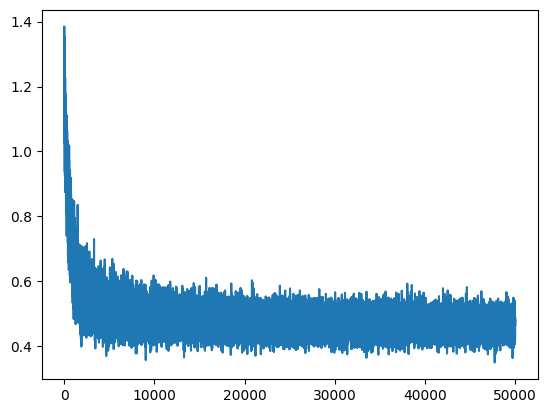

In [68]:
plt.plot(stepi, lossi)

In [69]:
# loss on development set

emb = C[Xdev]  # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1)  # (32, 100)
logits = h @ W2 + b2  # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.9310, grad_fn=<NllLossBackward0>)

In [70]:
# loss on training set

emb = C[Xte]  # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1)  # (32, 100)
logits = h @ W2 + b2  # (32, 27)
loss = F.cross_entropy(logits, Yte)
loss

tensor(2.9305, grad_fn=<NllLossBackward0>)

In [71]:
# we find test and dev loss are equal, which means
# network is very tiny
# how to make scaling up the size of neural network

In [72]:
# one possibility is to change the batch size and find

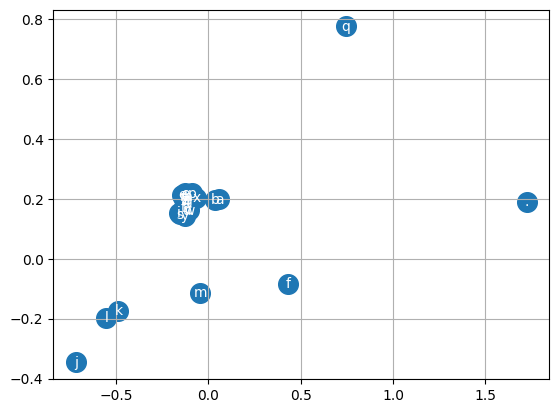

In [73]:
plt.figure(figure=(8, 8))
plt.scatter(C[:, 0].data, C[:, 1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i, 0].item(), C[i, 1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [74]:
# sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):
    out = []
    context = [0] * block_size  # initialize will all
    while True:
        emb = C[torch.tensor([context])]
        h = torch.tanh(emb.view(1, -1) @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs, num_samples=1, generator=g).item()
        context = context[1:] + [ix]
        out.append(ix)
        if ix == 0:
            break

    print(''.join(itos[i] for i in out))

erhaaimyazhsee.
mnd.
ryal.
.
ethrsjeadrnrg.
.
zejedieliihemi.
realekeiseananar.
eatzimhvaaa.
n.
shdbnrgshimies.
.
n.
ir.
nllkhxnteuofiu.
z.
nhd.
r.
yshuemehs.
laa.
